In [1]:
# Breast cancer dataset 212(M),357(B)
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
# https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3
# https://github.com/vishabh123/vishabh/blob/master/breast_cancer_analysis.py

# import numpy as np
# from sklearn.datasets import load_breast_cancer
# data = load_breast_cancer()
# type(data)
# list(data.target_names)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#importing the dataset 
dataset = pd.read_csv('./data.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values
print(type(dataset))
dataset.head()

<class 'pandas.core.frame.DataFrame'>


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [6]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


In [7]:
dataset.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

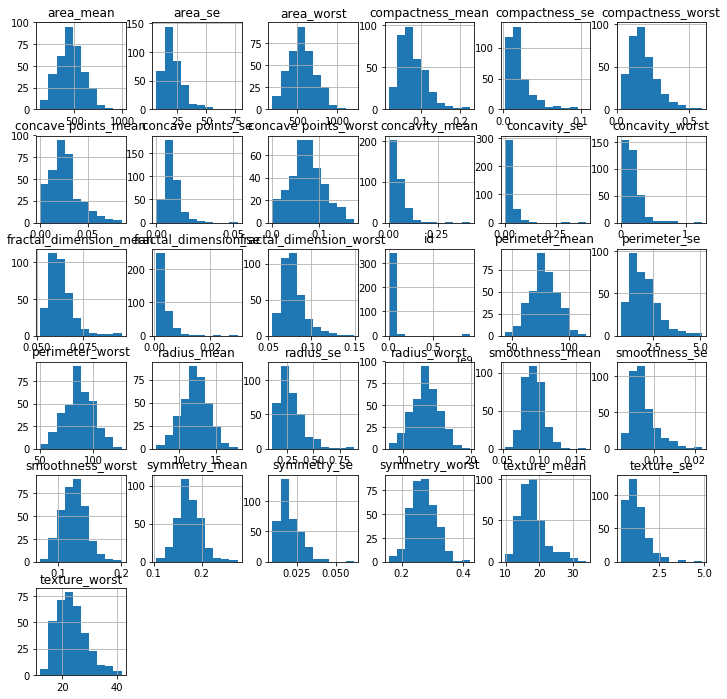

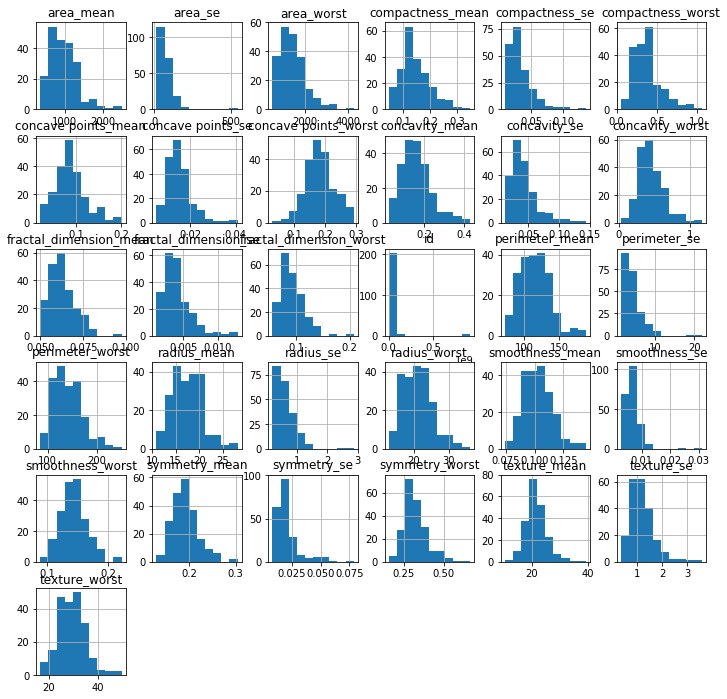

In [8]:
#Visualization of data
dataset.groupby('diagnosis').hist(figsize=(12, 12))
#plt.tight_layout()


In [9]:
dataset.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [10]:
dataset.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [11]:
dataframe = pd.DataFrame(Y)

In [12]:
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [13]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(Y_train))
print(np.shape(Y_test))


(426, 30)
(143, 30)
(426,)
(143,)


In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
#Fitting the Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
#95.8 Acuracy

In [14]:
classifier.fit(X_train, Y_train)

D:\Anaconda37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
#predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [16]:
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm[0,0],cm[0,1])
print(cm[1,0],cm[1,1])

87 3
3 50


In [17]:
TNTP = cm[0, 0] + cm[1, 1]
print(TNTP)

137


In [18]:
ACC = TNTP/(np.sum(np.sum(cm)))
ACC

0.958041958041958

## Creating a sigmoid-based ring topology ESN Reservoir

In [19]:
# ESN Paramenters
N = 200      # Neurons
mem = 0.1    # memory
scale = 0.1  # scaling factor

In [20]:
# Nonlinear mapping function
def sigmoid(x, exponent):
    return 1/(1+np.exp(-exponent*x))-0.5

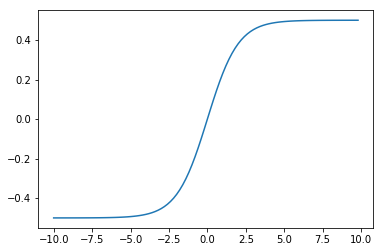

In [21]:
sigmoid_exponent = 1
func = sigmoid
a = np.linspace(-10, 10, 100, False)
b = func(a,sigmoid_exponent)
plt.plot(a,b)

In [22]:
# Mask parameters
M = 2*np.random.rand(np.shape(X_train)[1],N)-1
Mb = 2*np.random.rand(1,N)-1
print(np.shape(M))
print(np.shape(Mb))
print(np.min(M), np.max(M))
print(np.min(Mb), np.max(Mb))


(30, 200)
(1, 200)
-0.9997068615393612 0.999356704536507
-0.9936615752274949 0.9985478986110456


In [23]:
# Train set features
print(np.min(X_train), np.max(X_train))

-3.1604315949062247 11.597615106097704


In [24]:
# Create ESN 
ESN = np.ones((np.shape(X_train)[0],N), dtype=np.double)
IN = np.matmul(X_train, M) + np.repeat(Mb, np.shape(X_train)[0], axis=0)
print(np.shape(IN))
print(np.min(IN), np.max(IN))
p = np.zeros((1,N),dtype=np.double)
for i in range(np.shape(X_train)[0]):
    i
    in_val = scale*IN[i,:]+p*mem
    ESN[i,:] = func(in_val, sigmoid_exponent) #Apply transform
    p = np.copy(np.roll(ESN[i,:],1))

(426, 200)
-32.610986809823885 28.238279818717828


(426, 200)
-0.4627657847659434 0.4441567872638911


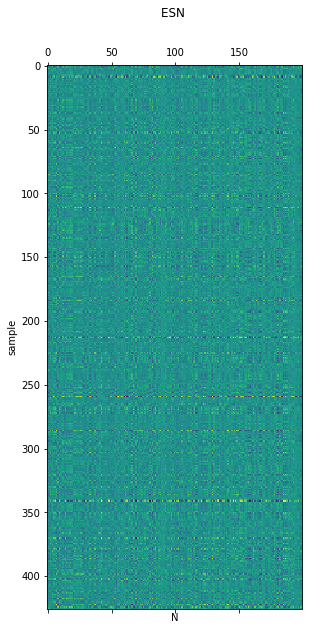

In [25]:
fig, ax = plt.subplots(figsize=(13,10))
ax.matshow((ESN[:,:]))
ax.set_title("ESN \n",loc='center')
ax.set_xlabel('N')
ax.set_ylabel('sample')
print(np.shape(ESN))
print(np.min(ESN), np.max(ESN))

In [49]:
ESNx = (np.hstack((ESN, np.ones((np.shape(ESN)[0],1), dtype=np.double))))
ESNinv = np.linalg.pinv(ESNx)
print(np.shape(ESNinv))

(201, 426)


In [43]:
Y_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,

In [50]:
ytrain = np.asarray(Y_train)
ytrain=ytrain.reshape(-1,1)
print(np.shape(ESNinv))
print(np.shape(Y_train))
print(np.shape(ytrain))
print(type(ESNinv))
print(type(ytrain))

(201, 426)
(426,)
(426, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [51]:
w = np.matmul(ESNinv, ytrain)
w

array([[ 2.22807736e+01],
       [ 7.69958433e+01],
       [ 2.35119616e+01],
       [ 2.32853619e+00],
       [-2.17769750e+01],
       [ 7.15288735e+01],
       [ 5.16528429e+01],
       [ 2.90871599e+00],
       [ 3.55610479e+01],
       [-1.35348285e+01],
       [ 4.14153706e+01],
       [-3.03118891e+01],
       [-1.22447502e+00],
       [ 9.28189827e+01],
       [-3.91920360e+01],
       [ 1.00120276e+01],
       [ 8.37895202e+00],
       [-5.23545904e-01],
       [-6.57962487e+01],
       [-2.47883745e+01],
       [-1.10051936e+01],
       [-2.42097310e+00],
       [ 5.21773086e+00],
       [ 3.26902876e+01],
       [ 1.90190406e+01],
       [-1.10025909e+02],
       [-5.50112743e+00],
       [ 2.05465238e+01],
       [ 3.62898417e+00],
       [ 4.74151668e+01],
       [ 7.47043361e+01],
       [ 1.54964602e+01],
       [ 2.73277486e+01],
       [-4.28920952e+00],
       [-1.12365743e+02],
       [ 5.14133048e+01],
       [ 1.99006456e+01],
       [ 3.17023003e+01],
       [-4.5

(array([ 1.,  0.,  3.,  6., 18., 28., 72., 43., 23.,  7.]),
 array([-193.36057   , -163.36621276, -133.37185553, -103.37749829,
         -73.38314106,  -43.38878382,  -13.39442659,   16.59993065,
          46.59428788,   76.58864512,  106.58300235]),
 <a list of 10 Patch objects>)

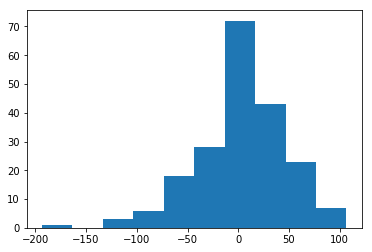

In [77]:
plt.hist(w)

In [52]:
print(type(ESNinv))
print(type(Y_train))
print(np.shape(Y_train.reshape(-1,1)))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(426, 1)


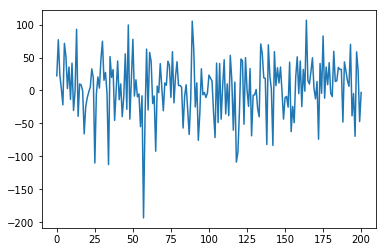

In [53]:
plt.plot(w)

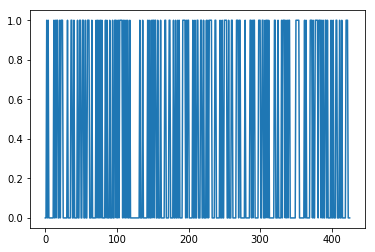

In [54]:
plt.plot(ytrain)

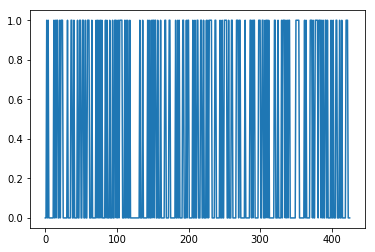

In [55]:
plt.plot(np.matmul(ESNx,w)>0.5)

# Test

In [56]:
# Create ESNtest
ESNtest = np.ones((np.shape(X_test)[0],N), dtype=np.double)
INtest = np.matmul(X_test, M) + np.repeat(Mb, np.shape(X_test)[0], axis=0)
print(np.shape(INtest))
print(np.min(INtest), np.max(INtest))
p = np.zeros((1,N),dtype=np.double)
for i in range(np.shape(X_test)[0]):
    i
    in_val = scale*INtest[i,:]+p*mem
    ESNtest[i,:] = func(in_val, sigmoid_exponent) #Apply transform
    p = np.copy(np.roll(ESNtest[i,:],1))

(143, 200)
-19.467810291182726 23.179300296787126


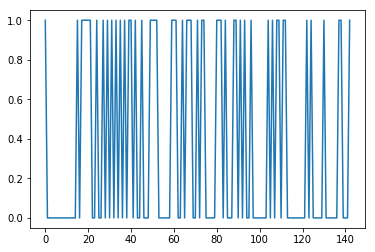

In [57]:
ytest = Y_test
plt.plot(ytest)


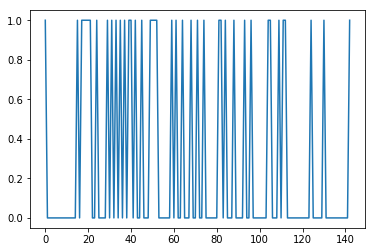

In [68]:
Y_pred = np.matmul((np.hstack((ESNtest, np.ones((np.shape(ESNtest)[0],1), dtype=np.double)))),w)>0.5
plt.plot(Y_pred)

In [72]:
np.asarray(np.transpose(Y_pred)==ytest,dtype=np.double)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.]])

In [74]:
np.sum(np.asarray(np.transpose(Y_pred)==ytest,dtype=np.double))

129.0

In [75]:
cm = confusion_matrix(ytest, (np.matmul((np.hstack((ESNtest, np.ones((np.shape(ESNtest)[0],1), dtype=np.double)))),w)>0.5))
cm

array([[89,  1],
       [13, 40]], dtype=int64)

In [76]:
TNTP = (cm[0,0]+cm[1,1])
(cm[0,0]+cm[1,1])/np.sum(np.sum(cm))

0.9020979020979021